# DATA SCIENCE & ML INTERNSHIP 
## MAIN PROJECT
---
## CAR PRICE PREDICTION
The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. The dataset for the used car prices is attached with this.
Split the dataset into training and testing dataset.
Develop and train the linear regression model using the training dataset.
Test the model with the test dataset.
Predict the price of a car.

## Import libraries

I'll import `datetime` to handle year, `numpy` to work with arrays and `pandas` to read in the dataset files, `matplotlib` & `seaborn` for plotting and `sklearn` for various machine learning models.

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Read dataset

I'll read the dataset and get information about it.

In [2]:
dataset = pd.read_csv("car.csv")
dataset.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 611.4+ KB


## Data Cleaning
drop the null value from the dataset

In [4]:
dataset=dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5975 non-null   int64  
 1   Name               5975 non-null   object 
 2   Location           5975 non-null   object 
 3   Year               5975 non-null   int64  
 4   Kilometers_Driven  5975 non-null   int64  
 5   Fuel_Type          5975 non-null   object 
 6   Transmission       5975 non-null   object 
 7   Owner_Type         5975 non-null   object 
 8   Mileage            5975 non-null   object 
 9   Engine             5975 non-null   object 
 10  Power              5975 non-null   object 
 11  Seats              5975 non-null   float64
 12  Price              5975 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 653.5+ KB


---
Let's first split the dataset into train and test datasets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 5333 to 865
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4182 non-null   int64  
 1   Name               4182 non-null   object 
 2   Location           4182 non-null   object 
 3   Year               4182 non-null   int64  
 4   Kilometers_Driven  4182 non-null   int64  
 5   Fuel_Type          4182 non-null   object 
 6   Transmission       4182 non-null   object 
 7   Owner_Type         4182 non-null   object 
 8   Mileage            4182 non-null   object 
 9   Engine             4182 non-null   object 
 10  Power              4182 non-null   object 
 11  Seats              4182 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 424.7+ KB


## Exploratory Data Analysis

Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

### Index

The first column is the index for each data point and hence we can simply remove it.

In [7]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

### Name

Let's explore the various cars in the dataset.

In [8]:
X_train["Name"].value_counts()

Mahindra XUV500 W8 2WD              34
Honda City 1.5 S MT                 26
Maruti Swift VDI                    26
Honda Amaze S i-Dtech               24
Toyota Fortuner 3.0 Diesel          24
                                    ..
Lamborghini Gallardo Coupe           1
Mahindra Jeep MM 540 DP              1
Porsche Cayenne 2009-2014 Diesel     1
Tata Zest Quadrajet 1.3              1
Maruti Ritz VDI (ABS) BS IV          1
Name: Name, Length: 1539, dtype: int64

As it appears, there are several cars in the dataset, some of them with a count higher than 1.
Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [9]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [10]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Let's also confirm that there are no null values and identify all unique values.

Text(0, 0.5, 'Count of cars')

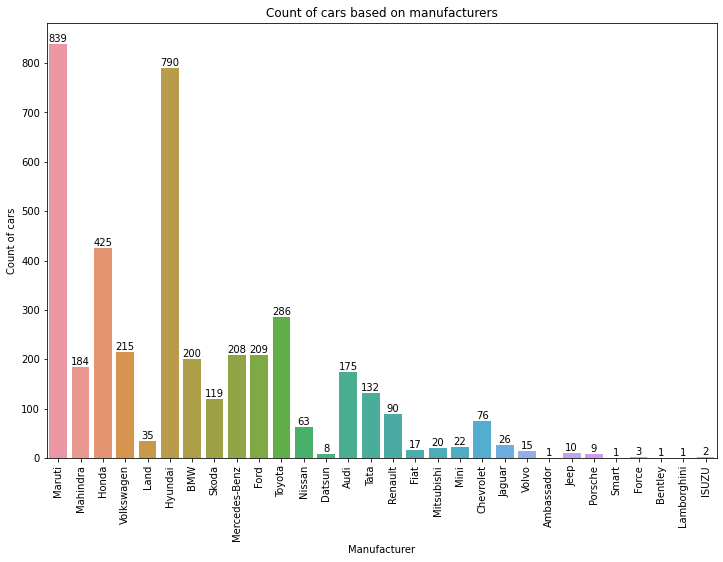

In [11]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer **Maruti** and there are no null values.

I'll also drop the `Name` column.

In [12]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [13]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [14]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

### Fuel_Type, Transmission,  and Owner_Type

All these columns are categorical columns which should be converted to dummy variables before being used.

### Kilometers_Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [15]:
X_train["Kilometers_Driven"]

5333     63001
1822     10500
2638     90400
2931     42000
5151    107023
         ...  
3799     30000
5233     75000
5268     28000
5433     34952
865     102000
Name: Kilometers_Driven, Length: 4182, dtype: int64

The data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure.

## Mileage

This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [16]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

Let's check for missing values.

In [17]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


There is no missing value in each.

## Engine, Power and Seats

The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so I'll remove `bhp` from it. Also, as there are missing values in `Engine`, `Power` and `Seats`, I'll again replace them with the mean.

In [18]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [19]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

## Data Processing

Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [20]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [21]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [22]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

Finally, as the last step of data processing, I'll scale the data.

In [23]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## Training and predicting

I'll create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions.

In [24]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.6975804373254644

In [25]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8660022782764425

The **Random Forest** model performed the best with a R2 score of **0.86**.